# Combining datasets

**Table of contents**<a id='toc0_'></a>    
- 1. [Concatenating datasets](#toc1_)    
- 2. [Merging datasets](#toc2_)    
  - 2.1. [Outer join: union](#toc2_1_)    
  - 2.2. [Inner join](#toc2_2_)    
  - 2.3. [Left join](#toc2_3_)    
  - 2.4. [Alternative function for left joins: `df.join()` which uses the index](#toc2_4_)    
- 3. [Other programming languages](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You may need to install the matplotlib_venn module. Uncomment the following cells and run to install.  
The %pip is a jupyter magic function, it is similar to writing pip install directly in your terminal/comand prompt. (see [Link](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)).  
You could also use a ! in front of each command, which indicates that this is a system command that may as well have been executed in the terminal/command prompt of your computer. 

In [3]:
# For Venn diagrams
#%pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from matplotlib_venn import venn2 # `pip install matplotlib-venn`

When **combining datasets** there are a few crucial concepts: 

1. **Concatenate (append)**: "stack" rows (observations) on top of each other. This works if the datasets have the same columns (variables).
2. **Merge**: the two datasets have different variables, but may or may not have the same observations. 

There are **different kinds of merges** depending on which observations you want to keep:

1. **Outer join (one-to-one)** Keep observations which are in *either* or in *both* datasets.
2. **Inner join (one-to-one)** Keep observations which are in *both* datasets. 
3. **Left join (one-to-one)** Keep observations which are in the *left* dataset or in *both* datasets. 

Keeping observations which are not in both datasets will result in **missing values** for the variables comming from the dataset, where the observation does not exist.

You can also merge datasets many-to-one or many-to-many (although the second one is generally not a good idea). Many means that there are multiple obersvations per unique ID that you are merging on.

[Pandas guide one combining datasets](https://pandas.pydata.org/docs/user_guide/merging.html)

**Read data:**

In [5]:
empl = pd.read_csv('data/RAS200_long.csv')
inc = pd.read_csv('data/INDKP107_long.csv')
area = pd.read_csv('data/area.csv')

For ease the datasets how been put in to the folder of this notebook, but we could also load directly from the load, clean and save folder. <br>
This is done by using .. to go back one folder:

In [6]:
# How to load data from folder that is not a direct subfolder
inc = pd.read_csv('../2 - Data Load, clean, and save/data/INDKP107_long.csv')

## 1. <a id='toc1_'></a>[Concatenating datasets](#toc0_)

Suppose we have two datasets that have the same variables and we just want to concatenate them.

In [7]:
empl.head(5)

,municipality,year,empl
0,Copenhagen,2009,70.0
1,Frederiksberg,2009,73.7
2,Dragør,2009,78.8
3,Tårnby,2009,76.3
4,Albertslund,2009,69.2


In [9]:
N = empl.shape[0]

A = empl.loc[empl.index < N/2,:] # first half of observations
B = empl.loc[empl.index >= N/2,:] # second half of observations

print(f'A has shape {A.shape} ')
print(f'B has shape {B.shape} ')

A has shape (644, 3) 
B has shape (643, 3) 


**Concatenation** is done using the command `pd.concat([df1, df2])`. 

In [10]:
C = pd.concat([A,B])
print(f'C has shape {C.shape} (same as the original empl, {empl.shape})')

C has shape (1287, 3) (same as the original empl, (1287, 3))


## 2. <a id='toc2_'></a>[Merging datasets](#toc0_)

Two datasets with **different variables**: `empl` and `inc`. 

**Central command:** `pd.merge(empl, inc, on=[municipalitiy, year], how=METHOD)`.  

1. The keyword `on` specifies the **merge key(s)**. They uniquely identify observations in both datasets (for sure in at least one of them).  

2. The keyword `how` specifies the **merge method** (taking values such as `'outer'`, `'inner'`, or `'left'`).

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)

**Look at datasets:**

In [12]:
print(f'Years in empl: {empl.year.unique()}')
print(f'Municipalities in empl = {len(empl.municipality.unique())}')
print(f'Years in inc: {inc.year.unique()}')
print(f'Municipalities in inc = {len(inc.municipality.unique())}')

Years in empl: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Municipalities in empl = 99
Years in inc: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Municipalities in inc = 98


**Find differences:**

In [14]:
diff_y = [y for y in inc.year.unique() if y not in empl.year.unique()] 
print(f'years in inc data, but not in empl data: {diff_y}')

diff_m = [m for m in empl.municipality.unique() if m not in inc.municipality.unique()] 
print(f'municipalities in empl data, but not in inc data: {diff_m}')

years in inc data, but not in empl data: [2008]
municipalities in empl data, but not in inc data: ['Christiansø']


**Conclusion:** `inc` has more years than `empl`, but `empl` has one municipality that is not in `inc`. 

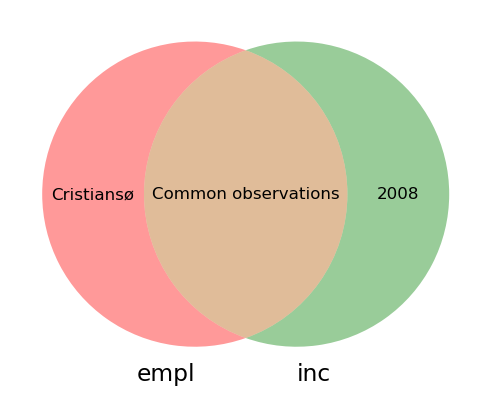

In [15]:
plt.figure()
v = venn2(subsets = (5, 5, 7), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('Cristiansø')
v.get_label_by_id('010').set_text('2008' )
v.get_label_by_id('110').set_text('Common observations')

# Set fontsize for the labels inside the circles
for text in v.subset_labels:
   text.set_fontsize(12)

plt.show()

### 2.1. <a id='toc2_1_'></a>[Outer join: union](#toc0_)

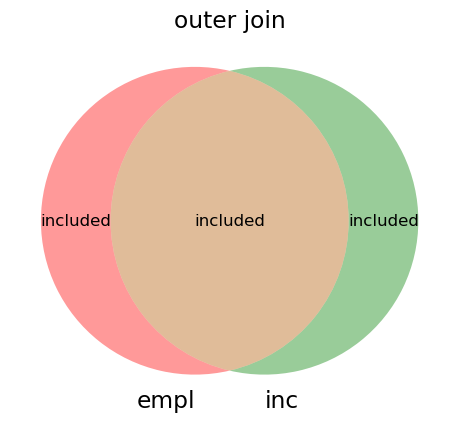

In [16]:
plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('included')
v.get_label_by_id('010').set_text('included')
v.get_label_by_id('110').set_text('included')

# Set fontsize for the labels inside the circles
for text in v.subset_labels:
   text.set_fontsize(12)


plt.title('outer join')
plt.show()

In [17]:
outer = pd.merge(empl,inc,on=['municipality','year'],how='outer')

print(f'Number of municipalities = {len(outer.municipality.unique())}')
print(f'Number of years = {len(outer.year.unique())}')

Number of municipalities = 99
Number of years = 14


We see that the **outer join** includes rows that exist in either dataframe and therefore includes missing values:

In [21]:
I = (outer.year.isin(diff_y)) | (outer.municipality.isin(diff_m))
print(I.sum())
outer.loc[I, :].head(15)

111


,municipality,year,empl,inc
29,Christiansø,2009,64.6,NaN
128,Christiansø,2010,67.8,NaN
227,Christiansø,2011,67.7,NaN
326,Christiansø,2012,69.6,NaN
425,Christiansø,2013,69.4,NaN
524,Christiansø,2014,70.0,NaN
623,Christiansø,2015,75.5,NaN
722,Christiansø,2016,77.8,NaN
821,Christiansø,2017,80.9,NaN
920,Christiansø,2018,82.0,NaN


**BE AWARE! `pd.merge` does not check whether the variables you're merging on are unique**

But you can ask it to do that by using the `validate` argument. 

In [22]:
# Python checks if we're doing the merge we're expecting to do and finds no error
outer = pd.merge(empl,inc,on=['municipality','year'],how='outer',validate='1:1')

In [23]:
# If only merge on municipality we are actually doing a many-to-many merge
try:
    outer = pd.merge(empl,inc,on=['municipality'],how='outer',validate='1:1')
except:
    print('We are not allowed to do this')


We are not allowed to do this


In [32]:
I = (empl.municipality=='Copenhagen')
empl[I]

,municipality,year,empl
0,Copenhagen,2009,70.0
99,Copenhagen,2010,69.7
198,Copenhagen,2011,69.6
297,Copenhagen,2012,69.4
396,Copenhagen,2013,69.7
495,Copenhagen,2014,70.0
594,Copenhagen,2015,70.8
693,Copenhagen,2016,71.5
792,Copenhagen,2017,72.2
891,Copenhagen,2018,73.2


In [25]:
# A many-to-many would NOT be desired in this case, as it repeats a lot of data
m_to_m = pd.merge(empl,inc,on=['municipality'],how='outer')
m_to_m.head(20)

,municipality,year_x,empl,year_y,inc
0,Copenhagen,2009,70.0,2008.0,259216.0
1,Copenhagen,2009,70.0,2009.0,266636.0
2,Copenhagen,2009,70.0,2010.0,297422.0
3,Copenhagen,2009,70.0,2011.0,303717.0
4,Copenhagen,2009,70.0,2012.0,308601.0
5,Copenhagen,2009,70.0,2013.0,316362.0
6,Copenhagen,2009,70.0,2014.0,325070.0
7,Copenhagen,2009,70.0,2015.0,334083.0
8,Copenhagen,2009,70.0,2016.0,327179.0
9,Copenhagen,2009,70.0,2017.0,333579.0


### 2.2. <a id='toc2_2_'></a>[Inner join](#toc0_)

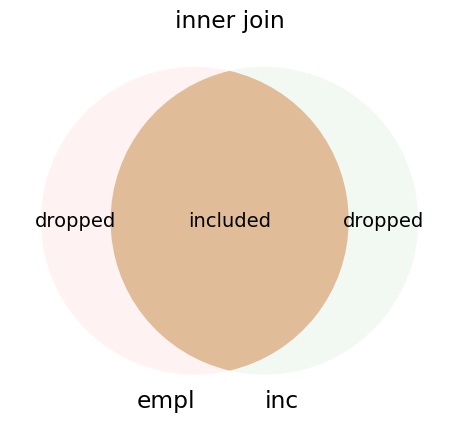

In [33]:
plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('dropped'); v.get_patch_by_id('100').set_alpha(0.05)
v.get_label_by_id('010').set_text('dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('included')
plt.title('inner join')
plt.show()

In [34]:
inner = pd.merge(empl,inc,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(inner.municipality.unique())}')
print(f'Number of years          = {len(inner.year.unique())}')

Number of municipalities = 98
Number of years          = 13


We see that the **inner join** does not contain any rows that are not in both datasets. 

In [35]:
I = (inner.year.isin(diff_y)) | (inner.municipality.isin(diff_m))
inner.loc[I, :].head(15)

,municipality,year,empl,inc


### 2.3. <a id='toc2_3_'></a>[Left join](#toc0_)

It is very common to use **left join**. It is also known as a *many-to-one* join. 

* **Left dataset:** `inner` many observations of a given municipality (one per year),
* **Right dataset:** `area` at most one observation per municipality and new variable (km2). 

In [36]:
inner_with_area = pd.merge(inner, area, on='municipality', how='left')
inner_with_area.head(10)

,municipality,year,empl,inc,km2
0,Copenhagen,2009,70.0,266636.0,90.1
1,Frederiksberg,2009,73.7,304406.0,8.7
2,Dragør,2009,78.8,375508.0,18.3
3,Tårnby,2009,76.3,296610.0,66.1
4,Albertslund,2009,69.2,283067.0,23.4
5,Ballerup,2009,72.9,313293.0,33.9
6,Brøndby,2009,69.6,277210.0,21.0
7,Gentofte,2009,76.6,429525.0,25.6
8,Gladsaxe,2009,75.0,318082.0,24.9
9,Glostrup,2009,76.1,324666.0,13.3


In [38]:
print(f'inner has shape {inner.shape}')
print(f'area has shape {area.shape}')
print(f'merge result has shape {inner_with_area.shape}')

inner has shape (1274, 4)
area has shape (99, 2)
merge result has shape (1274, 5)


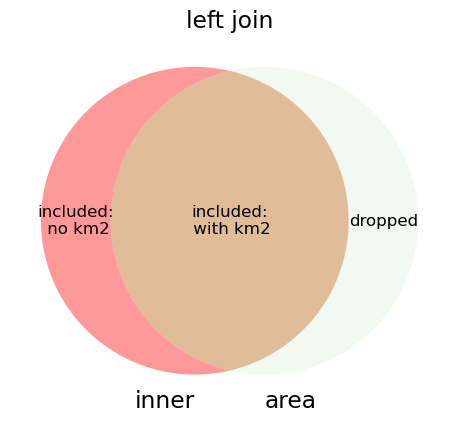

In [39]:
plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('inner', 'area'))
v.get_label_by_id('100').set_text('included:\n no km2'); 
v.get_label_by_id('010').set_text('dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('included:\n with km2')

# Set fontsize for the labels inside the circles
for text in v.subset_labels:
   text.set_fontsize(12)

plt.title('left join')
plt.show()

**Important:** Finding the non-overlapping observations

In [41]:
not_in_area = [m for m in inner.municipality.unique() if m not in area.municipality.unique()]
not_in_inner = [m for m in area.municipality.unique() if m not in inner.municipality.unique()]

print(f'There are {len(not_in_area)} municipalities in inner that are not in area. They are:')
print(not_in_area)
print('')

print(f'There is {len(not_in_inner)} municipalities in area that are not in inner. They are:')
print(not_in_inner)
print('')

There are 0 municipalities in inner that are not in area. They are:
[]

There is 1 municipalities in area that are not in inner. They are:
['Christiansø']



**Check that km2 is never missing:**

In [42]:
inner_with_area.km2.isna().sum()

0

### 2.4. <a id='toc2_4_'></a>[Alternative function for left joins: `df.join()` which uses the index](#toc0_)

To use a left join function `df.join()`, we must first set the **index**. Technically, we do not need this, but if you ever need to join on more than one variable, `df.join()` requires you to work with indices so we might as well learn it now. 

The main difference between `df.join()` and `df.merge()` is whether you're merging on the index or selected variables, but it is handy to have in your toolbelt.

In [43]:
area.sample(10)

,municipality,km2
79,Aarhus,468.1
60,Fredericia,133.6
35,Faxe,404.9
64,Tønder,1283.9
48,Faaborg-Midtfyn,633.6
56,Ærø,90.1
5,Ballerup,33.9
58,Esbjerg,795.4
26,Hørsholm,31.3
65,Varde,1240.1


In [44]:
inner.set_index(['municipality', 'year'], inplace=True)
area.set_index('municipality', inplace=True)

In [47]:
inner.head()
final = inner.join(area)
print(f'final has shape: {final.shape}')
final.head(5)

final has shape: (1274, 3)


,,empl,inc,km2
municipality,year,,,
Copenhagen,2009,70.0,266636.0,90.1
Frederiksberg,2009,73.7,304406.0,8.7
Dragør,2009,78.8,375508.0,18.3
Tårnby,2009,76.3,296610.0,66.1
Albertslund,2009,69.2,283067.0,23.4


## 3. <a id='toc3_'></a>[Other programming languages](#toc0_)

**SQL** (including SAS *proc sql*)

SQL is one of the most powerful database languages and many other programming languages embed a version of it. For example, SAS has the `proc SQL`, where you can use SQL syntax. 

SQL is written in statements such as 

* **left join**   `select * from empl left join inc on empl.municipality = inc.municipality and empl.year = inc.year`
* **outer join** `select * from empl full outer join inc on empl.municipality = inc.municipality and empl.year = inc.year`

**STATA**

In Stata, the command `merge` nests many of the commands mentioned above. You specify `merge 1:1`  for a one-to-one merge or `merge m:1`  or `merge 1:m`  for many-to-one or one-to-many merges, and you do not use `merge m:m` (until you are quite advanced). 

### Additional links
* Do you have **missing values** in data? Check [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
* Comparison of SQL statements and pandas group by [here](https://realpython.com/pandas-groupby/)
